# Constructing Sophisticated Deep Neural Network Architectures with Keras

The Keras Functional API is an extension to the Sequential model that provides greater flexibility in building complex models. It achieves this by allowing us to combine simple building blocks, each of which takes one or more inputs, processes them, and returns one output. This article provides an overview of the architecture of the Keras Functional API and includes examples of how to use it for your own purposes.

# List of Contents:

1. Importing the data and constructing a basic model.
2. Creating a wide and deep neural network.
3. Developing a wide and deep neural network with several inputs.
4. Constructing a wide and deep neural network with multiple inputs and outputs.


# 1. Importing the data and constructing a basic model.
Initially, we will import the [MNSIT Fashion](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset, which we will be utilizing throughout this article. This dataset comprises various fashion categories and has ten distinct classes.

In [1]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt

Now, we will import the dataset using the **Keras.datasets** library, divide it into training and validation sets, and then normalize the data.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Now let's print the size of the datasets and the labels:

In [3]:
print('The size of the trainig data is {} and the size of the train labels is {}' .format(X_train.shape , y_train.shape))
print('The size of the validation data is {} and the size of the validation labels is {}' .format(X_valid.shape , y_valid.shape))
print('The size of the test data is {} and the size of the test labels is {}' .format(X_test.shape , y_test.shape))

The size of the trainig data is (55000, 28, 28) and the size of the train labels is (55000,)
The size of the validation data is (5000, 28, 28) and the size of the validation labels is (5000,)
The size of the test data is (10000, 28, 28) and the size of the test labels is (10000,)


The training data consists of 55000 images, while the validation and test data contain 5000 and 10000 images, respectively. Each image has dimensions of 28 by 28 pixels.

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

To gain a clearer understanding of the data we are dealing with, let's visualize a portion of it. Figure 1 displays the data.

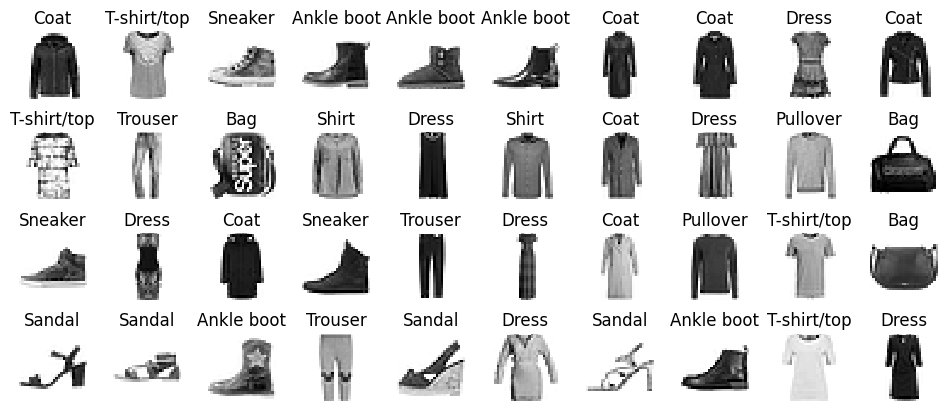

In [5]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

For the sake of simplicity, we will flatten the data into a one-dimensional array, making it easier to use within neural networks.

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_valid = X_valid.reshape(X_valid.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [7]:
X_train.shape

(55000, 784)

As illustrated in the figure below, we will construct and train a basic MLP neural network.

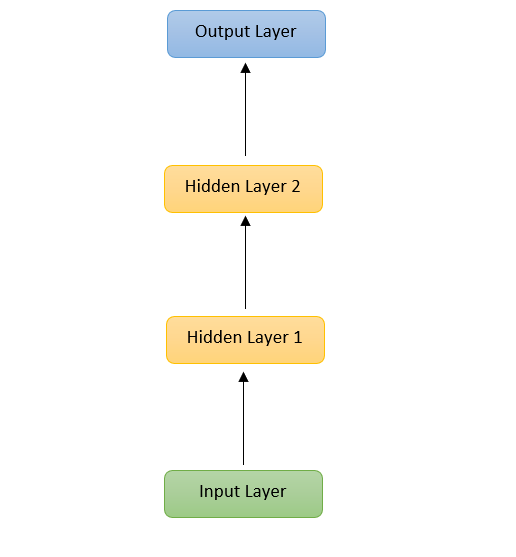

We will now construct the model depicted in figure 2. The code is straightforward: we begin by specifying the input layer with the expected input size. Then, we add the first hidden layer, which has 30 neurons and uses the Relu activation function, followed by a second hidden layer with identical parameters. The output layer has as many neurons as there are classes in our data, which is 10 in this case. We will use the plot_model function from the Keras utils library to visualize the model.

In [8]:
input_ = keras.layers.Input(shape=[28*28])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
output = output = keras.layers.Dense(10, activation="softmax", name="output")(hidden2)
model = keras.models.Model(inputs=[input_], outputs=[output])

keras.utils.plot_model(model, "Neural_Network.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Now let's compile the model and fit it to the training data and plot the learning curve using the code below:

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.8592 - accuracy: 0.7059 - val_loss: 0.5950 - val_accuracy: 0.7956
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5428 - accuracy: 0.8105 - val_loss: 0.5064 - val_accuracy: 0.8244
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4844 - accuracy: 0.8291 - val_loss: 0.4502 - val_accuracy: 0.8466
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4523 - accuracy: 0.8402 - val_loss: 0.4797 - val_accuracy: 0.8190
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4303 - accuracy: 0.8475 - val_loss: 0.4302 - val_accuracy: 0.8556
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4129 - accuracy: 0.8546 - val_loss: 0.4191 - val_accuracy: 0.8524
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4003 - accuracy: 0.8581 - val_loss: 0.3915 - val_accuracy:

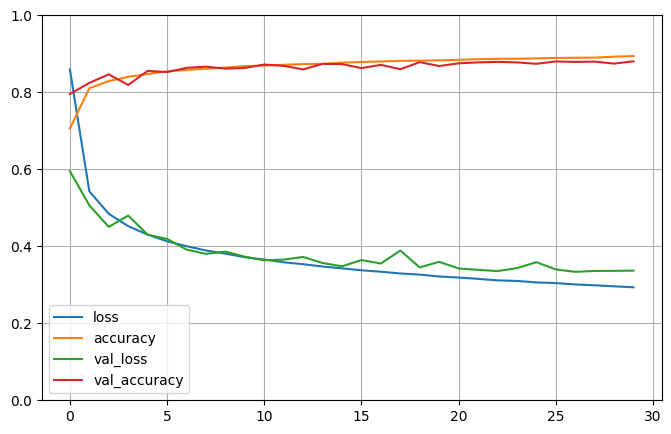

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

The last step involves assessing the model's performance on the test data and reporting the accuracy and loss. With an accuracy of 86.7%, the model performs well, especially considering its simplicity.

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 918us/step - loss: 0.3708 - accuracy: 0.8696


[0.3707740008831024, 0.8695999979972839]

# 2. Creating a wide and deep neural network.

One example of a more complex model is the wide and deep network, a non-sequential neural network first introduced by Heng-Tze Cheng et al. in their paper [Wide & Deep Learning for Recommender Systems](https://arxiv.org/abs/1606.07792). As shown in figure 5, some or all of the inputs are directly connected to the output layer in this model. This architecture enables the model to learn both deep information through the deep path and simple information directly from the input via the wide path.

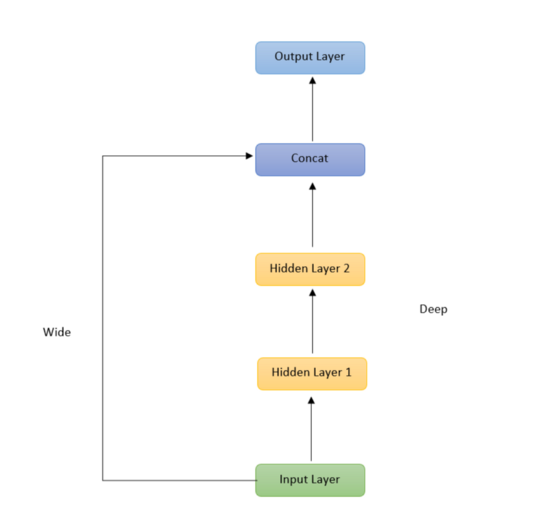

We can use the Keras API to construct this architecture, and to verify that the resulting model matches our desired specifications, we will visualize its structure using the **Keras.utils.plot_model** method. Figure 6 displays the resulting model.

In [11]:
input_ = keras.layers.Input(shape=[28*28])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = output = keras.layers.Dense(10, activation="softmax", name="output")(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

keras.utils.plot_model(model, "Deep & wide.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Let's take a closer look at the code:

* **input_**: We begin by creating an Input object, which defines the model's input type and shape. Multiple Input objects can be used in a single model, as we will see in later examples.
* **hidden1**: Next, we create the first hidden layer, which has 30 neurons and uses the ReLU activation function. We pass the Input object we created earlier as an argument to this layer. This is similar to calling a function, hence the name Functional API.
* **hidden2**: We then add another hidden layer with the same properties as the first one, passing the output of the first hidden layer as its input.
* **concat**: This is a Concatenate layer that combines the original input with the output of the second hidden layer.
* **output**: The output layer consists of a single neuron and has no activation function for simplicity, but you can add whatever is necessary for your model.
* **model**: Finally, we create a Keras model and specify its inputs and outputs.

After constructing the model, we need to compile it, fit it to the training data, and plot its learning curve. This can be accomplished using the code below:

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8394 - accuracy: 0.7357 - val_loss: 0.6247 - val_accuracy: 0.8022
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5903 - accuracy: 0.8068 - val_loss: 0.5479 - val_accuracy: 0.8270
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5327 - accuracy: 0.8219 - val_loss: 0.5066 - val_accuracy: 0.8378
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5010 - accuracy: 0.8294 - val_loss: 0.4811 - val_accuracy: 0.8396
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4798 - accuracy: 0.8359 - val_loss: 0.4682 - val_accuracy: 0.8420
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4640 - accuracy: 0.8405 - val_loss: 0.4494 - val_accuracy: 0.8506
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4518 - accuracy: 0.8435 - val_loss: 0.4398 - val_accuracy:

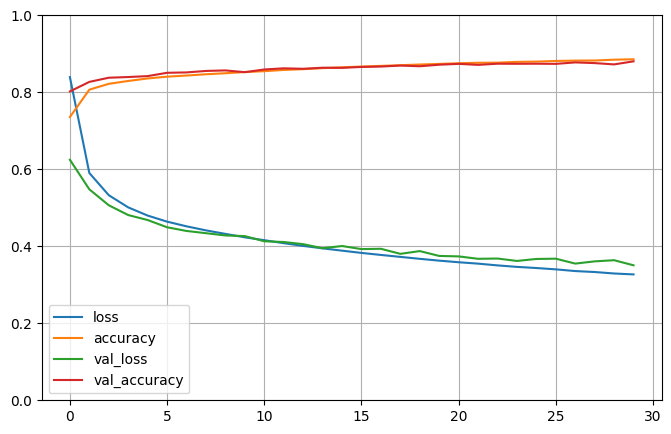

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

The last step involves assessing the model's performance on the test data and reporting its accuracy and loss. With an accuracy of 85.9%, the model performs well, despite its simplicity. However, its accuracy is slightly lower than that of the simple MLP model we introduced earlier.

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3783 - accuracy: 0.8651


[0.3783164322376251, 0.8651000261306763]

# 3. Developing a wide and deep neural network with several inputs.

An interesting modification that can be made to the previous model is to create two separate paths for the input. This can be useful if, for example, you want to send some input features through the wide path and others through the deep path. Figure 8 illustrates this model.

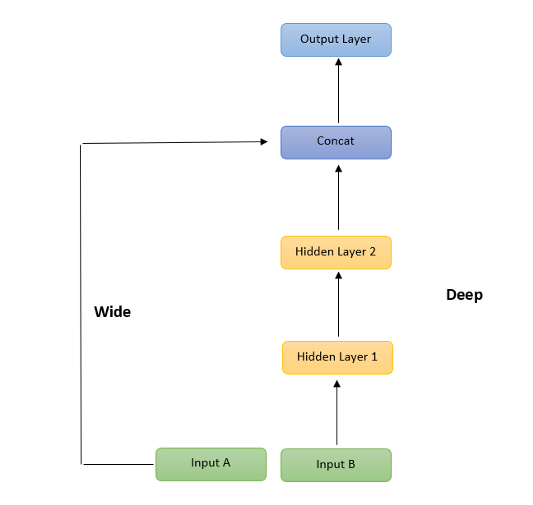

Let's construct this model, dividing the input features equally between the deep and wide paths. We will then visualize the resulting model, as shown in figure 9.

In [14]:
input_A = keras.layers.Input(shape=[392], name="wide_input")
input_B = keras.layers.Input(shape=[392], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(10, activation="softmax", name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

keras.utils.plot_model(model, "multiple_inputs_model.png", show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


The code for this model is similar to the previous one, with the exception that we need to define two separate inputs (input_A and input_B) when creating the model. Each input has a shape of 392, which is half the total number of features.

Now, we will compile the model and train it on the data using the following code:

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

X_train_A, X_train_B = X_train[:, :392], X_train[:, 392:]
X_valid_A, X_valid_B = X_valid[:, :392], X_valid[:, 392:]
X_test_A, X_test_B = X_test[:, :392], X_test[:, 392:]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9647 - accuracy: 0.6925 - val_loss: 0.6911 - val_accuracy: 0.7726
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6273 - accuracy: 0.7906 - val_loss: 0.5717 - val_accuracy: 0.8090
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5511 - accuracy: 0.8111 - val_loss: 0.5217 - val_accuracy: 0.8216
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5133 - accuracy: 0.8231 - val_loss: 0.4925 - val_accuracy: 0.8328
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4900 - accuracy: 0.8301 - val_loss: 0.4713 - val_accuracy: 0.8390
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4724 - accuracy: 0.8355 - val_loss: 0.4599 - val_accuracy: 0.8456
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4594 - accuracy: 0.8399 - val_loss: 0.4497 - val_accuracy:

As you can see the compile and fit methods are similar to the previous code the only difference is in the fit method in which we have to give two inputs for training data, validation, and test data. Finally, we will evaluate this model using the test data using the code below:

In [16]:
test = model.evaluate((X_test_A, X_test_B), y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.8525


# 4. Constructing a wide and deep neural network with multiple inputs and outputs.

Our final model will be a wide and deep neural network with multiple inputs and outputs, as depicted in figure 10. This type of model can be useful in several scenarios, such as:

* When you have multiple outputs, such as in object detection and classification tasks where you need to return both the object's coordinates and its class.
* When you are working on multiple tasks simultaneously, each with its own output layer. For example, you might be working on facial detection, emotion recognition, and identity identification tasks, all of which require separate output layers.
* For regularization purposes, where multiple outputs can be used to reduce overfitting and improve the model's ability to generalize to new data.

In the example below, we will use an auxiliary output in a neural network to ensure that the underlying part of the network learns useful information independently of the rest of the network.

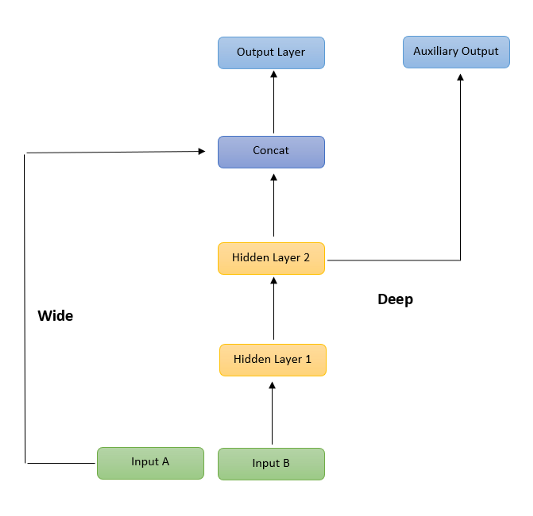

In [17]:
input_A = keras.layers.Input(shape=[392], name="wide_input")
input_B = keras.layers.Input(shape=[392], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(10, activation="softmax",name="main_output")(concat)
aux_output = keras.layers.Dense(10, activation="softmax", name="aux_output")(hidden2)

model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

keras.utils.plot_model(model, "model.png", show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


We will now compile the model and train it on the data. Since our model has two outputs, we need to define two separate loss functions (if we only specify one loss function, it will be applied to both outputs). We also need to specify the weight of each loss, otherwise, the model will assume that both outputs contribute equally to the overall loss. In this case, we want to give more importance to the main output than the auxiliary output, so we will assign a weight of 0.7 to the main output's loss and 0.3 to the auxiliary output's loss.

In [18]:
model.compile(loss=["sparse_categorical_crossentropy","sparse_categorical_crossentropy" ],
              optimizer="sgd",
              loss_weights=[0.7, 0.3],
              metrics=["accuracy"])

Let's now fit the model on the training data:

In [19]:
X_train_A, X_train_B = X_train[:, :392], X_train[:, 392:]
X_valid_A, X_valid_B = X_valid[:, :392], X_valid[:, 392:]
X_test_A, X_test_B = X_test[:, :392], X_test[:, 392:]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 1.2337 - main_output_loss: 1.0593 - aux_output_loss: 1.6405 - main_output_accuracy: 0.6659 - aux_output_accuracy: 0.4555 - val_loss: 0.8379 - val_main_output_loss: 0.7258 - val_aux_output_loss: 1.0994 - val_main_output_accuracy: 0.7510 - val_aux_output_accuracy: 0.6200
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7594 - main_output_loss: 0.6567 - aux_output_loss: 0.9988 - main_output_accuracy: 0.7771 - aux_output_accuracy: 0.6464 - val_loss: 0.6849 - val_main_output_loss: 0.5961 - val_aux_output_loss: 0.8919 - val_main_output_accuracy: 0.7958 - val_aux_output_accuracy: 0.6786
Epoch 3/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6633 - main_output_loss: 0.5711 - aux_output_loss: 0.8782 - main_output_accuracy: 0.8028 - aux_output_accuracy: 0.6832 - val_loss: 0.6256 - val_main_output_loss: 0.5424 - val_aux_output_loss: 0.8197 - val_main_output_accuracy: 0.8

Finally, let's evaluate the model on the test data:

In [20]:
model.evaluate([X_test_A, X_test_B], [y_test, y_test])

313/313 [==============================] - 1s 1ms/step - loss: 0.4962 - main_output_loss: 0.4309 - aux_output_loss: 0.6486 - main_output_accuracy: 0.8488 - aux_output_accuracy: 0.7676


[0.49621543288230896,
 0.43092480301856995,
 0.6485608220100403,
 0.848800003528595,
 0.7675999999046326]

As you can see this will return five numbers as the following: 
* Total loss: 0.4938
* Main output loss: 0.4289
* Auxiliary output loss: 0.6451
* Main output accuracy:  0.8497
* Auxiliary output accuracy:  0.7645